# [Multi-Class Prediction of Obesity Risk](https://www.kaggle.com/competitions/playground-series-s4e2/overview) <a class="anchor" id="section-2"></a>
## EDA - Exploratory Data Analysis

<br>Name: Vilma Hietala
<br>Date: 6/3/2024
<br>The datasets for this competition were generated from a deep learning model trained on the [Obesity or CVD risk dataset](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster).
<br>The original dataset consists of the estimation of obesity levels in people from the countries of Mexico, Peru, and Colombia, with the ages between 14 and 61 years old. The people had diverse eating habits and physical conditions. The data was collected using a web platform with an anonymous survey.  


### Table of Contents 

- [Data Dictionary](#section-4)
- [Target column 'NObeyesdad' values & value counts](#section-5)
- [Explore the dataset](#section-1)
    - [Value counts & ranges](#subsection-1-1)
    - [NaN values & duplicate rows](#subsection-1-5)
    - [Convert data with type 'object' into numerical form](#subsection-1-2)
    - [Create column 'BMI'](#subsection-1-7)
    - [Outliers](#subsection-1-6)
                  <br> - [BMI and Target Column](#subsection-1-6-1)
    - [Correlation](#subsection-1-4)
    - [Visualizations](#subsection-1-8)

    

___

### Data Dictionary <a class="anchor" id="section-4"></a>


| Variable       | Definition           | 
| ------------- |:-------------:| 
| FAVC    | Frequent consumption of high caloric food | 
| FCVC    | Frequency of consumption of vegetables |
| NCP    | Number of main meals |
| CAEC    | Consumption of food between meals | 
| CH20    | Consumption of water daily |
| CALC    | Consumption of alcohol |
| SCC    | Calories consumption monitoring | 
| FAF    | Physical activity frequency |
| TUE    | Time using technology devices |
| MTRANS    |Transportation used |



### Target column 'NObeyesdad' values & value counts <a class="anchor" id="section-5"></a>
| Value      | Value count           | 
| ------------- |:-------------:| 
| Insufficient_Weight   | 2405 |
| Normal_Weight        |  3466 |
| Overweight_Level_I    | 4112 |
| Overweight_Level_II   | 1995 |
| Obesity_Type_I        | 1765 |
| Obesity_Type_II     |   3719 |
| Obesity_Type_III   |    3293 |




___




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 900)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

## Explore the dataset <a class="anchor" id="section-1"></a>

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# How big the train dataset is
train_data.shape

(20758, 18)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [6]:
train_data.describe(include='object').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


___

### Value counts & ranges <a class="anchor" id="subsection-1-1"></a>
[Back to top](#section-2)

In [7]:
def value_counts(df):
    """
    Display value counts for each column in the DataFrame.

    Parameters:
        - df (pd.DataFrame): The pandas DataFrame for which value counts are to be displayed.

    Returns:
        None

    Prints:
        For each column in the DataFrame:
        - If the column is numeric (int or float) and has less than 5 unique values, displays the value counts.
        - If the column is numeric (int or float) and has 5 or more unique values, displays the range of values.
        - If the column is of object type, displays the value counts.
    """
    for col in df.columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            if len(df[col].value_counts()) < 5:
                print(f"### {col} ### \n{df[col].value_counts()} \n------------------------ \n")
            else:
                print(f"### {col} ### \nValues range from {df[col].min()} to {df[col].max()} \n------------------------ \n")
        else:
            print(f"### {col} ### \n{df[col].value_counts().to_string()} \n------------------------ \n")
        
value_counts(train_data)

### id ### 
Values range from 0 to 20757 
------------------------ 

### Gender ### 
Female    10422
Male      10336 
------------------------ 

### Age ### 
Values range from 14.0 to 61.0 
------------------------ 

### Height ### 
Values range from 1.45 to 1.975663 
------------------------ 

### Weight ### 
Values range from 39.0 to 165.057269 
------------------------ 

### family_history_with_overweight ### 
yes    17014
no      3744 
------------------------ 

### FAVC ### 
yes    18982
no      1776 
------------------------ 

### FCVC ### 
Values range from 1.0 to 3.0 
------------------------ 

### NCP ### 
Values range from 1.0 to 4.0 
------------------------ 

### CAEC ### 
Sometimes     17529
Frequently     2472
Always          478
no              279 
------------------------ 

### SMOKE ### 
no     20513
yes      245 
------------------------ 

### CH2O ### 
Values range from 1.0 to 3.0 
------------------------ 

### SCC ### 
no     20071
yes      687 
------------------

___

### NaN values & Duplicate Rows <a class="anchor" id="subsection-1-5"></a>
[Back to top](#section-2)
<br> There are no duplicate rows in the dataset.
<br>As seen previously while using info() method, there are no NaN (Not a Number) values in the dataset. Let's see another way for checking NaN values:

In [8]:
# count percentage of nan values in each column
train_data.isna().sum()/len(train_data)*100

id                                0.0
Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

In [9]:
# There are no duplicate rows in the DataFrame
train_data.duplicated().sum()

0

___

### Convert data with type 'object' into numerical form <a class="anchor" id="subsection-1-2"></a>
[Back to top](#section-2)
- 'CALC', 'MTRANS' and 'NObeyesdad' are nominal data and can't be put in a meaningful order. That's why I chose to use get_dummies for 'CALC' and 'MTRANS', which is a function in pandas used for one-hot encoding.
- 'CAEC' is ordinal since the values can be placed in a meaningful order.


#### Numerical format for target column
0 = Insufficient_Weight
<br>1 = Normal_Weight
<br>2 = Overweight_Level_I
<br>3 = Overweight_Level_II
<br>4 = Obesity_Type_I
<br>5 = Obesity_Type_II
<br>6 = Obesity_Type_III


In [10]:
object_columns = [col for col in train_data.columns if train_data[col].dtype == 'object']
print(object_columns)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [11]:
train_data['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
train_data['family_history_with_overweight'].replace({'no': 0, 'yes': 1}, inplace=True)
train_data['FAVC'].replace({'no': 0, 'yes': 1}, inplace=True)
train_data['SCC'].replace({'no': 0, 'yes': 1}, inplace=True)
train_data['SMOKE'].replace({'no': 0, 'yes': 1}, inplace=True)
train_data['NObeyesdad'].replace({'no': 0, 'yes': 1}, inplace=True)

In [12]:
train_data['NObeyesdad'].replace({
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}, inplace=True)

In [13]:
train_data = pd.get_dummies(train_data, columns=[ 'CALC', 'MTRANS'], prefix_sep="_", prefix=[ 'CALC', 'MTRANS'])

In [14]:
train_data["CAEC"].value_counts()

Sometimes     17529
Frequently     2472
Always          478
no              279
Name: CAEC, dtype: int64

In [15]:
rating_order = ['no', "Sometimes", "Frequently", "Always"] 
ordinal_enconder = OrdinalEncoder(categories=[rating_order])
train_data["CAEC"] = ordinal_enconder.fit_transform(train_data[["CAEC"]])

In [16]:
train_data["CAEC"].value_counts()

1.0    17529
2.0     2472
3.0      478
0.0      279
Name: CAEC, dtype: int64

___

### Create column 'BMI' <a class="anchor" id="subsection-1-7"></a>
[Back to top](#section-2)

In [17]:
def calculate_bmi(row, weight_column, height_column):
    """
    This function calculates the BMI row by row in DataFrame.
    
    Parameters:
        - row (pd.Series): A single row of data from a pandas DataFrame.
        - weight_column (str): Height in meters.
        - height_column (str): Weight in kilograms.
    Returns:
        - BMI (float): Calculated BMI.
    """

    weight = row[weight_column]
    height = row[height_column]
    bmi = weight / (height ** 2)
    return bmi

In [18]:
train_data['BMI'] = train_data.apply(calculate_bmi, args=('Weight', 'Height'), axis=1)

In [19]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,NObeyesdad,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI
0,0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1.0,0,2.763573,0,0.000000,0.976473,3,0,1,0,0,0,0,1,0,28.259565
1,1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2.0,0,2.000000,0,1.000000,1.000000,1,0,0,1,1,0,0,0,0,23.422091
2,2,1,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1.0,0,1.910378,0,0.866045,1.673584,0,0,0,1,0,0,0,1,0,17.126706
3,3,1,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1.0,0,1.674061,0,1.467863,0.780199,6,0,1,0,0,0,0,1,0,44.855798
4,4,0,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1.0,0,1.979848,0,1.967973,0.931721,3,0,1,0,0,0,0,1,0,25.599151


___

### Outliers <a class="anchor" id="subsection-1-6"></a>
[Back to top](#section-2)
<br> Standard deviation can be used to check how much an individual value within a column differs from the mean of the column. 
<br> In this dataset, the values detected by using the z-score formula are not outliers, except for one value.
- Age: Fewer people are over 40 years old in this dataset, but it doesn't make them outliers. It might be due that the online questionnaire didn't reach older people or for some other reason.
- Height: The Z-score detects 4 outliers in this column, all of which are precisely 1.975663 meters. Looking into the rows with these Height values I can see, that only one is an outlier. Maybe a typo, since with a height of 1.9m and weight of 53kg  the BMI is 13.8 which means a fatal underweight. Rest of the detected values seems to be normal, even though they differ from the mean.
- The rest of the outliers detected are columns that had object datatype and were converted into numerical format. Because the values are either 1 or 0, the z-score is not suitable for these columns. 

___
#### Z-Score Formula

The statistical formula for a value's z-score is calculated using the following formula:

    z = ( x - μ ) / σ 

Where:

    z = Z-score
    x = the value being evaluated
    μ = the mean
    σ = the standard deviation
___

In [20]:
def z_score(col, df):
    """
    Detects outliers in a given column of a DataFrame using Z-score method.

    Parameters:
    - col (str): The name of the column in the DataFrame.
    - df (pd.DataFrame): The pandas DataFrame.

    Returns:
    - outliers (list): A list containing the outliers found in the column, based on the Z-score threshold of 3 standard deviations from the mean.
    """
    outliers = []
    mean = np.mean(df[col])
    std_dev = np.std(df[col])
    
    for value in df[col]:
        z_score = (value - mean) / std_dev
        if abs(z_score) > 3:
            outliers.append(value)
    
    return outliers

In [21]:
print("---------- OUTLIERS Z-Score ----------")
for col in train_data.columns:
    outliers = z_score(col, train_data)
    if len(outliers) < 5:
        print(f"{col}: {z_score(col, train_data)}")
    elif len(np.unique(outliers)) == 1:
        print(f"{col}: Has {len(outliers)} detected outliers that are all value {np.unique(outliers)}")
    else:
       print(f"{col}: Has {len(outliers)} detected outliers that are values from {np.min(outliers)} to {np.max(outliers)}") 
  

---------- OUTLIERS Z-Score ----------
id: []
Gender: []
Age: Has 275 detected outliers that are values from 40.951591 to 61.0
Height: [1.975663, 1.975663, 1.975663, 1.975663]
Weight: []
family_history_with_overweight: []
FAVC: Has 1776 detected outliers that are all value [0]
FCVC: []
NCP: []
CAEC: Has 478 detected outliers that are all value [3.]
SMOKE: Has 245 detected outliers that are all value [1]
CH2O: []
SCC: Has 687 detected outliers that are all value [1]
FAF: []
TUE: []
NObeyesdad: []
CALC_Frequently: Has 529 detected outliers that are all value [1]
CALC_Sometimes: []
CALC_no: []
MTRANS_Automobile: []
MTRANS_Bike: Has 32 detected outliers that are all value [1]
MTRANS_Motorbike: Has 38 detected outliers that are all value [1]
MTRANS_Public_Transportation: []
MTRANS_Walking: Has 467 detected outliers that are all value [1]
BMI: []


In [22]:
height = train_data[(train_data['Height'] == 1.975663)]
height.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,NObeyesdad,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI
1271,1271,0,30.717727,1.975663,125.117633,1,1,2.955300,3.000000,1.0,1,1.000000,0,0.922014,0.000000,5,0,1,0,0,0,0,1,0,32.054779
4084,4084,0,20.491475,1.975663,53.783977,1,1,2.000000,3.000000,1.0,0,2.000000,0,0.767013,1.000000,0,0,1,0,0,0,0,1,0,13.779301
7272,7272,0,30.702559,1.975663,120.775439,1,1,2.176317,3.000000,1.0,0,2.224164,0,1.487987,1.441605,5,0,1,0,1,0,0,0,0,30.942321
11718,11718,0,18.000000,1.975663,108.413119,1,1,2.000000,2.164839,1.0,0,3.000000,0,1.066101,0.429081,4,0,0,1,0,0,0,1,0,27.775130


In [23]:
index_to_drop = train_data[train_data['id'] == 4084].index
train_data.drop(index_to_drop, inplace=True)

___

#### BMI & Target Column <a class="anchor" id="subsection-1-6-1"></a>
[Back to top](#section-2)
<br>According to the BMI, many records have the wrong target group in column 'NObeyesdad'. For example, 'Obesity_Type_III' has a row with a BMI of 18 which should be in the category 'Underweight'.
<br>We need to fix all rows to have right category in the column 'NObeyesdad'.
<br> There are also records with BMI less than 13. A BMI below 18.5 is generally considered underweight, so these might be typos. After consideration I decided to remove records with BMI less than 13.

BMI SCORING
| BMI      | Nutritional status           | 
| ------------- |:-------------:| 
| Below 18.5   |    Underweight |
| 18.5–24.9     |   Normal weight |
| 25.0–29.9        |  Pre-obesity |
| 30.0–34.9        | Obesity class I |
| 35.0–39.9   | Obesity class II |
| Above 40   | Obesity class III |


#### NObeyesdad
0 = Insufficient_Weight
<br>1 = Normal_Weight
<br>2 = Overweight_Level_I
<br>3 = Overweight_Level_II
<br>4 = Obesity_Type_I
<br>5 = Obesity_Type_II
<br>6 = Obesity_Type_III



In [24]:
train_data.groupby(['NObeyesdad'], dropna=False)['BMI'].agg(['mean', 'min', 'max'])

,mean,min,max
NObeyesdad,,,
0,17.585128,12.868541,36.778115
1,22.000999,14.631670,32.882414
2,26.059270,15.761880,35.555556
3,28.192491,21.513859,36.741456
4,32.154649,16.597443,46.805188
5,36.521958,24.048460,46.222483
6,41.781745,18.178670,54.997991


In [25]:
for index, row in train_data.iterrows():
    bmi = row['BMI']
    if bmi < 18.5:
        train_data.at[index, 'NObeyesdad'] = 0  # Insufficient_Weight
    elif bmi >= 18.5 and bmi < 24.9:
        train_data.at[index, 'NObeyesdad'] = 1  # Normal_Weight
    elif bmi >= 24.9 and bmi < 28.9:
        train_data.at[index, 'NObeyesdad'] = 2  # Overweight_Level_I
    elif bmi >= 28.9 and bmi < 32.1:
        train_data.at[index, 'NObeyesdad'] = 3  # Overweight_Level_2
    elif bmi >= 32 and bmi < 34.9:
        train_data.at[index, 'NObeyesdad'] = 4  # Obesity_Type_I
    elif bmi >= 34.9 and bmi < 39.9:
        train_data.at[index, 'NObeyesdad'] = 5  # Obesity_Type_II
    else:
        train_data.at[index, 'NObeyesdad'] = 6  # Obesity_Type_III


In [26]:
train_data.groupby(['NObeyesdad'], dropna=False)['BMI'].agg(['mean', 'min', 'max'])

,mean,min,max
NObeyesdad,,,
0,17.277909,12.868541,18.496499
1,22.031844,18.503007,24.897060
2,26.862004,24.913495,28.899693
3,30.601641,28.900867,32.095294
4,33.414486,32.103019,34.897114
5,37.273181,34.908022,39.898320
6,42.725086,39.902544,54.997991


In [27]:
potential_outliers = train_data[(train_data['BMI'] <= 13)]
potential_outliers.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,NObeyesdad,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI
12381,12381,0,20.000000,1.870000,45.000000,0,1,3.000000,3.000000,2.0,0,2.000000,1,2.00000,0.00000,0,0,1,0,0,0,0,1,0,12.868541
16251,16251,1,16.270434,1.834986,43.534531,0,1,2.945967,3.488342,1.0,0,2.386904,0,2.11137,1.36595,0,0,1,0,0,0,0,1,0,12.929102


In [28]:
index_to_drop = train_data[train_data['id'] == 12381].index
train_data.drop(index_to_drop, inplace=True)

In [29]:
index_to_drop = train_data[train_data['id'] == 16251].index
train_data.drop(index_to_drop, inplace=True)

___

### Correlation <a class="anchor" id="subsection-1-4"></a>
[Back to top](#section-2)

In [30]:
train_data.corr(method='pearson', min_periods=1)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,NObeyesdad,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI
id,1.000000,0.000841,0.007679,0.012102,0.014063,0.010644,0.004152,0.001995,-0.000369,-0.001936,0.011546,0.007888,-0.011258,0.016626,0.007658,0.012162,-0.013383,0.002646,0.002148,-0.012570,-0.004036,-0.012429,0.012797,0.002246,0.011227
Gender,0.000841,1.000000,-0.066536,-0.623622,-0.118702,-0.095793,-0.021798,0.312773,-0.039489,0.046227,-0.063359,-0.053336,0.061752,-0.238454,-0.058783,0.072096,-0.055401,0.078823,-0.061149,-0.148800,-0.022269,-0.015958,0.168185,-0.062688,0.091417
Age,0.007679,-0.066536,1.000000,-0.011466,0.283250,0.261457,0.056890,0.034489,-0.048397,-0.151491,0.055996,-0.016291,-0.108780,-0.192168,-0.296130,0.328467,0.036088,0.049240,-0.063973,0.605382,0.006388,0.013750,-0.545779,-0.078664,0.320702
Height,0.012102,-0.623622,-0.011466,1.000000,0.417385,0.228564,0.115513,-0.071619,0.191303,-0.069137,0.069810,0.183747,-0.096493,0.295242,0.076375,0.112701,0.038192,0.067542,-0.083628,0.054925,0.013719,0.002390,-0.068764,0.040589,0.098845
Weight,0.014063,-0.118702,0.283250,0.417385,1.000000,0.514040,0.228879,0.245846,0.096098,-0.337320,0.040398,0.318012,-0.184882,-0.084678,-0.086432,0.929717,-0.048065,0.264176,-0.255111,-0.002180,-0.021773,-0.023151,0.043813,-0.099349,0.941063
family_history_with_overweight,0.010644,-0.095793,0.261457,0.228564,0.514040,1.000000,0.152245,0.047992,0.044922,-0.204160,0.018766,0.191689,-0.166375,-0.094174,0.005772,0.490872,-0.017197,0.009767,-0.003810,0.102086,-0.026291,-0.006300,-0.060278,-0.088568,0.498700
FAVC,0.004152,-0.021798,0.056890,0.115513,0.228879,0.152245,1.000000,0.006936,0.011497,-0.115704,-0.016004,0.039160,-0.112051,-0.067070,0.034833,0.225968,-0.044518,0.116572,-0.104074,0.014391,-0.027489,-0.023161,0.035850,-0.118509,0.215681
FCVC,0.001995,0.312773,0.034489,-0.071619,0.245846,0.047992,0.006936,1.000000,0.113310,0.010778,-0.012186,0.101280,0.021867,-0.089967,-0.147842,0.294526,-0.036754,0.162704,-0.154513,-0.095606,-0.012133,0.006727,0.093341,-0.006336,0.297160
NCP,-0.000369,-0.039489,-0.048397,0.191303,0.096098,0.044922,0.011497,0.113310,1.000000,0.089959,0.006829,0.080925,0.006562,0.100800,0.067410,0.059564,-0.003382,0.107919,-0.110141,0.007495,0.002854,0.004870,-0.024926,0.045584,0.048922
CAEC,-0.001936,0.046227,-0.151491,-0.069137,-0.337320,-0.204160,-0.115704,0.010778,0.089959,1.000000,0.019711,-0.132820,0.099008,0.091958,0.049778,-0.344324,0.078819,-0.126674,0.101995,-0.045396,0.014075,0.020674,0.013908,0.068134,-0.350509


___

### Visualizations <a class="anchor" id="subsection-1-8"></a>
[Back to top](#section-2)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CAEC'}>],
       [<Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>, <Axes: title={'center': 'FAF'}>,
        <Axes: title={'center': 'TUE'}>],
       [<Axes: title={'center': 'NObeyesdad'}>,
        <Axes: title={'center': 'CALC_Frequently'}>,
        <Axes: title={'center': 'CALC_Sometimes'}>,
        <Axes: title={'center': 'CALC_no'}>,
        <Axes: title={'center': 'MTRANS_Automobile'}>],
       [<Axes: title={'center': 'MTRANS_Bike'}>,
        <Axes: title={'center': 'MTRANS_Motorb

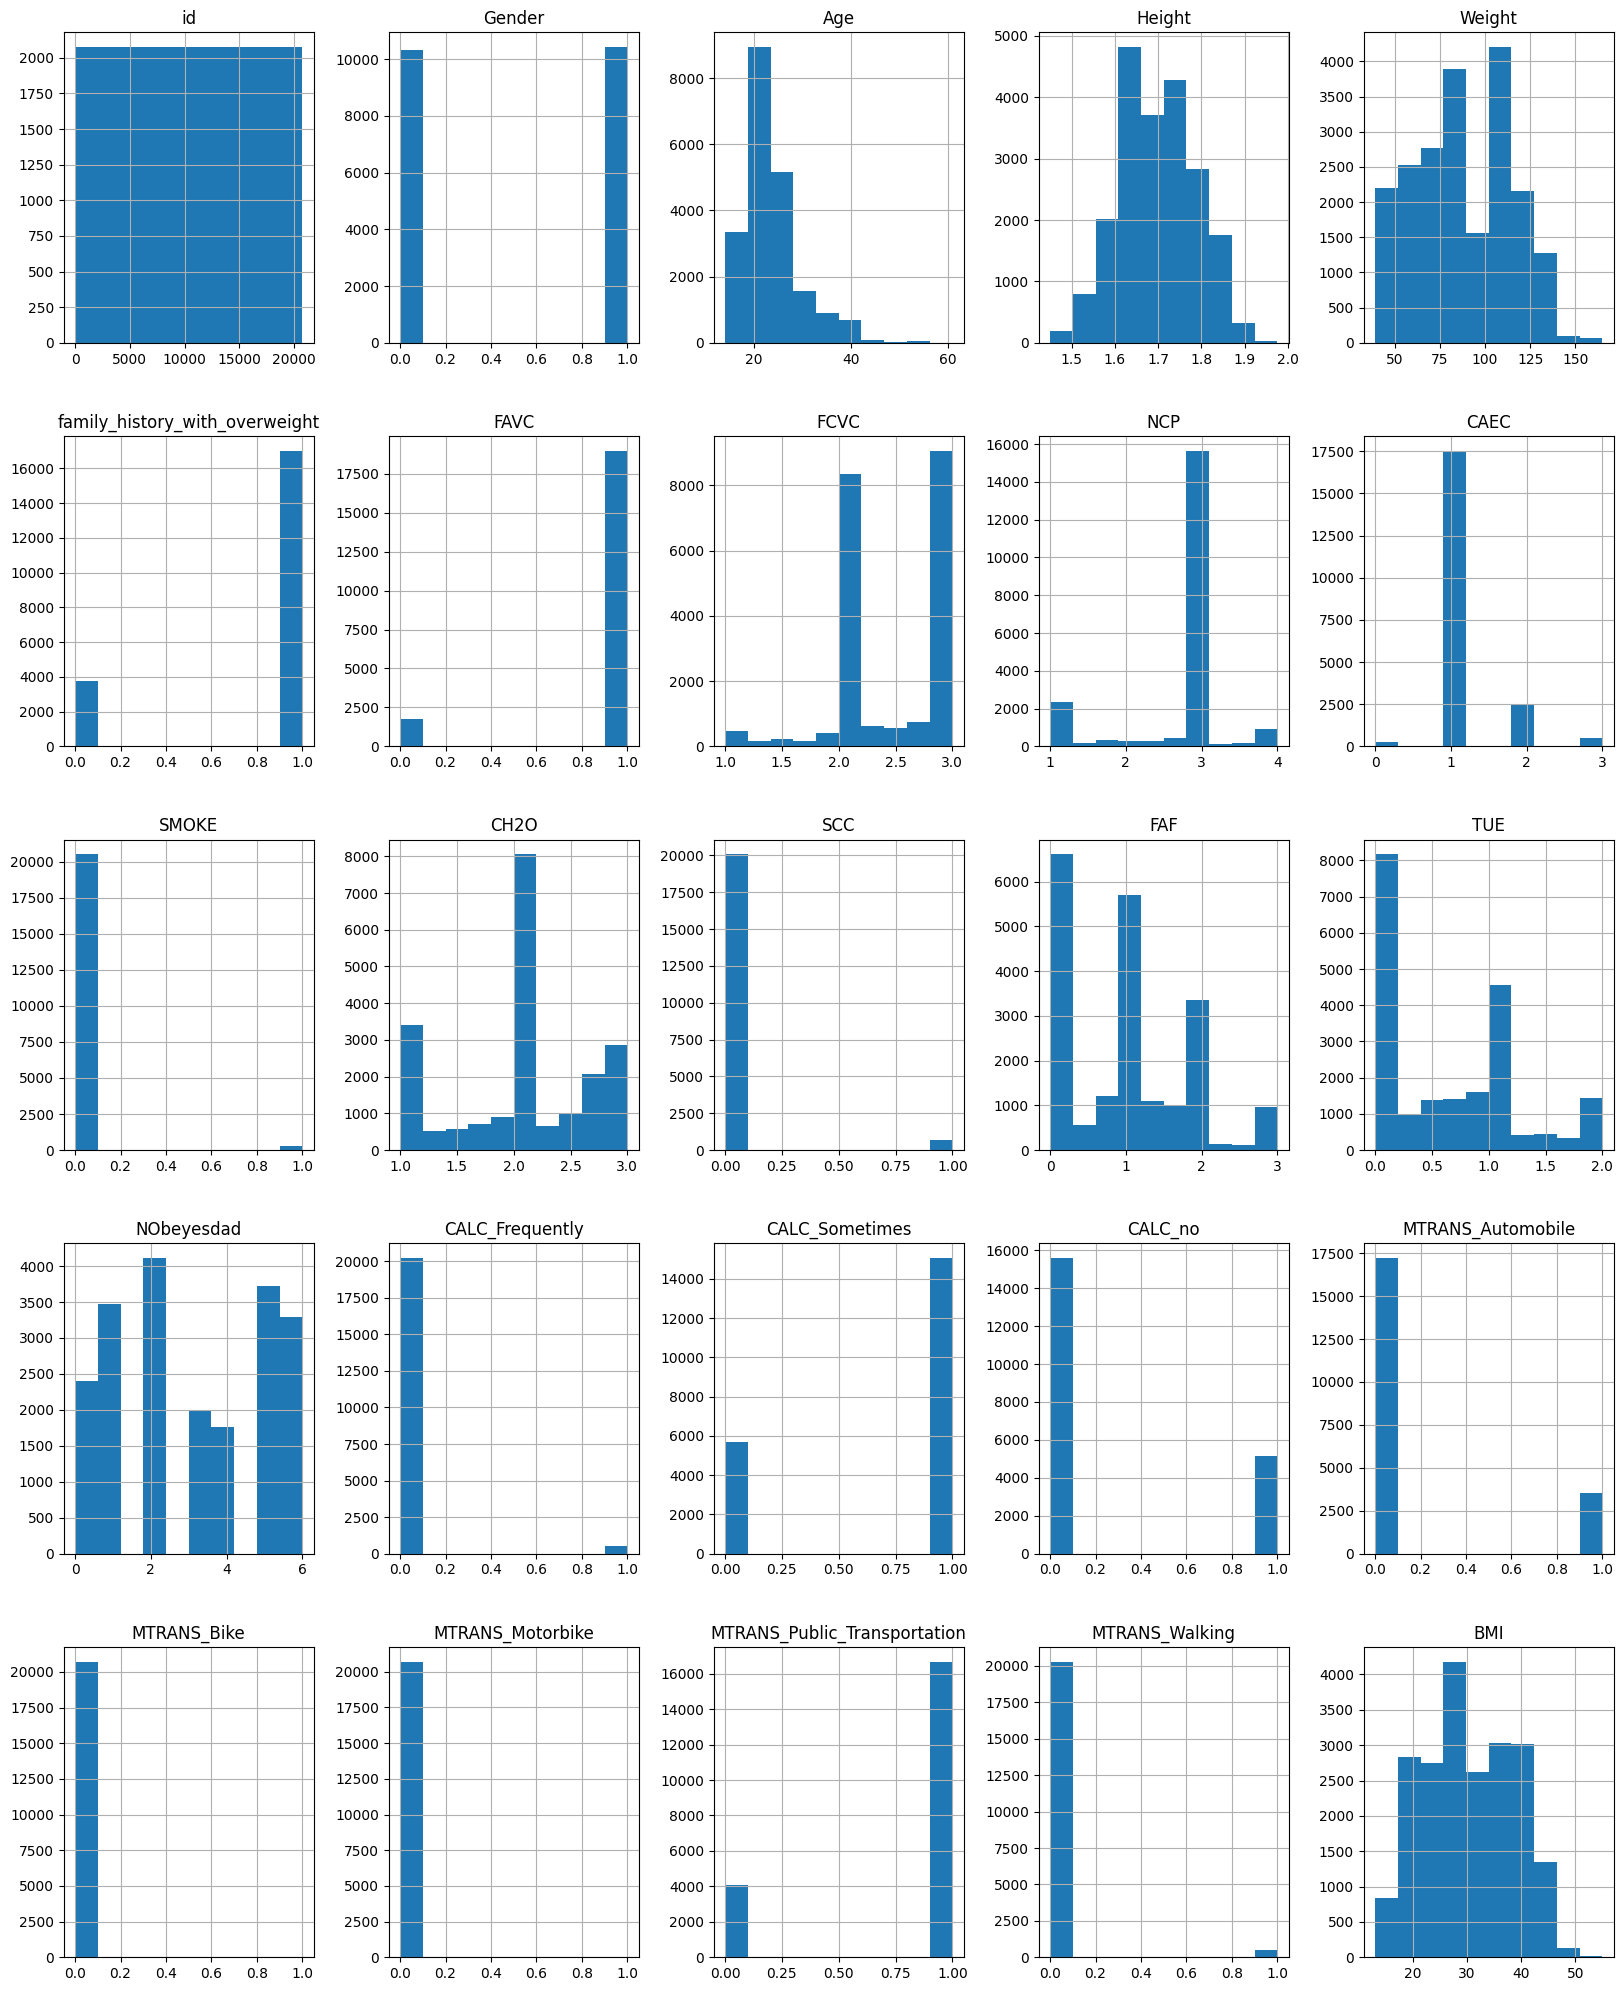

In [31]:
train_data.hist(figsize=(20,25))

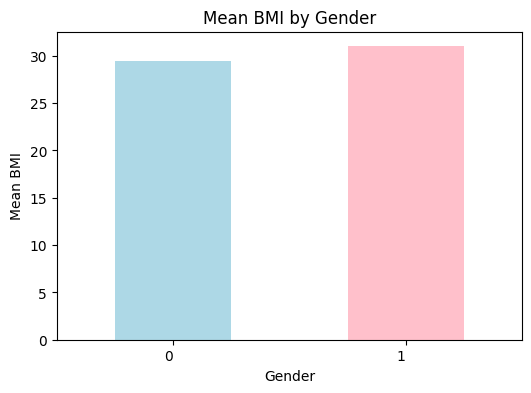

In [32]:
mean_bmi_by_gender = train_data.groupby(['Gender'], dropna=False)['BMI'].mean()
colors = ['lightblue', 'pink']
plt.figure(figsize=(6, 4))
mean_bmi_by_gender.plot(kind='bar', color=colors)
plt.title('Mean BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean BMI')
plt.xticks(rotation=360, ha='right')
plt.show()

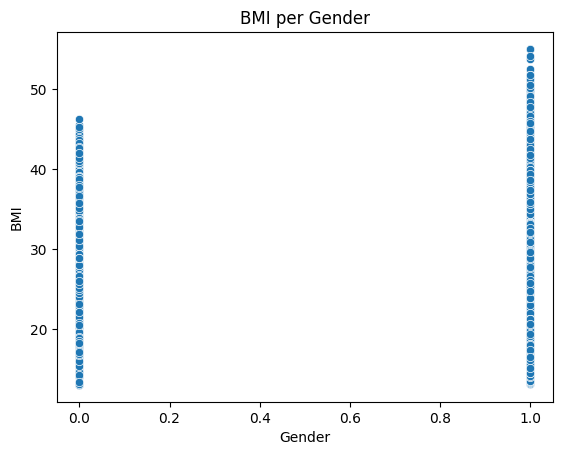

In [33]:
ax = sns.scatterplot(x="Gender", y="BMI", data=train_data)
ax.set_title("BMI per Gender")
ax.set_xlabel("Gender");

In [34]:
NObeyesdad_value_counts = train_data.groupby(['Gender'], dropna=False)['NObeyesdad'].value_counts()
NObeyesdad_value_counts

Gender  NObeyesdad
0       5             2834
        2             2576
        1             1605
        4             1295
        3             1039
        0              874
        6              111
1       6             3182
        1             1861
        2             1536
        0             1531
        3              956
        5              885
        4              470
Name: NObeyesdad, dtype: int64

In [35]:
# creating DataFrame
visualization_df = pd.DataFrame({
    'Insufficient_Weight': [1531, 874],
    'Normal_Weight': [1861, 1605],
    'Overweight_Level_I': [1536, 2576],
    'Overweight_Level_II': [956, 1039],
    'Obesity_Type_I': [470, 1295],
    'Obesity_Type_II': [885, 2834],
    'Obesity_Type_III': [3182, 111]
}, index=['Female', 'Male'])

In [36]:
visualization_df.head()

,Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III
Female,1531,1861,1536,956,470,885,3182
Male,874,1605,2576,1039,1295,2834,111


<Axes: title={'center': 'Male and Female Weight Categories'}>

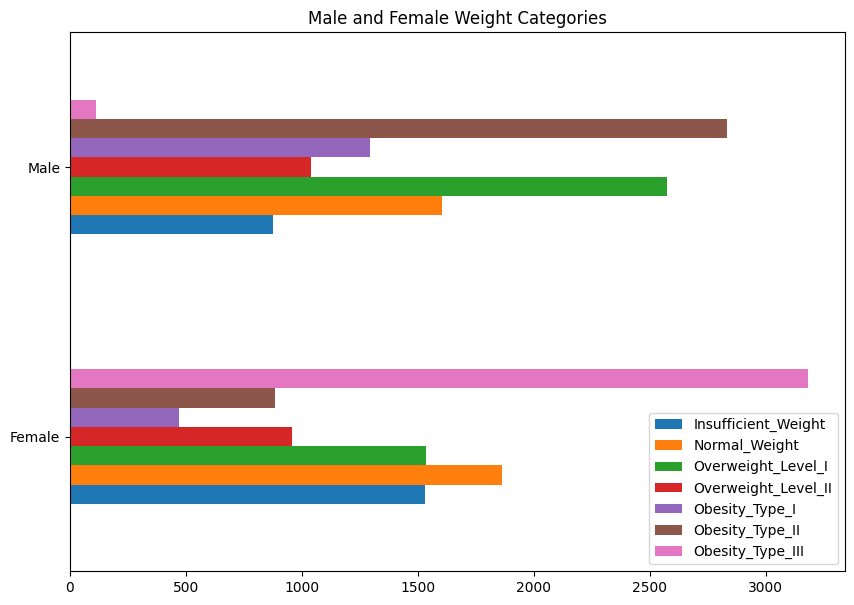

In [37]:
visualization_df.plot(kind='barh', figsize=(10,7), title="Male and Female Weight Categories")

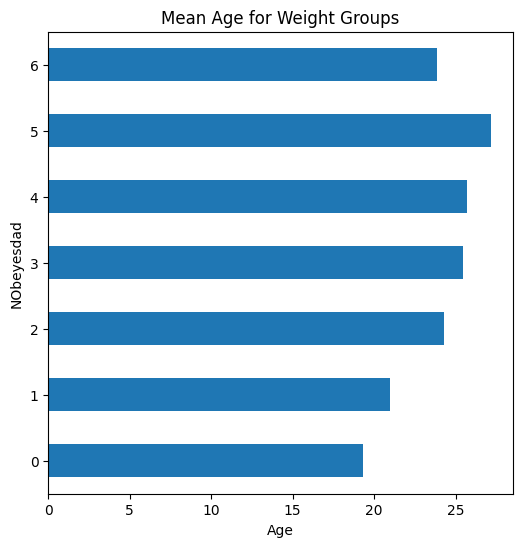

In [38]:
median_age = train_data.groupby(['NObeyesdad'], dropna=False)['Age'].mean()
median_age.plot(kind='barh', figsize=(6,6), title="Mean Age for Weight Groups")
plt.xlabel('Age')
plt.ylabel('NObeyesdad')
plt.show()

___